In [ ]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import datetime as dt
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Patch
import os
from shutil import copy
import seaborn as sns
import scipy.stats as stats
import datetime
from dateutil.relativedelta import relativedelta
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
import imageio
from itertools import compress

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams.update({'figure.max_open_warning': 0})

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'legend.title_fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
#‘xx-small’, ‘x-small’, ‘small’, ‘medium’, ‘large’, ‘x-large’, ‘xx-large’
pylab.rcParams.update(params)
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
# from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
from statsmodels.tsa.api import VAR

from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn import tree

import re

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
df_smolt_data = pd.read_csv('smolt_dataset.csv',delimiter=";")

df_smolt_data.insert(loc = 51, column = 'date_conf', value = np.nan)
df_smolt_data.reset_index(drop = True, inplace = True)
df_smolt_data ['transfer_date']= pd.to_datetime(df_smolt_data['transfer_date'])
df_smolt_data ['date_conf']= pd.to_datetime(df_smolt_data['date_conf'])                                                               
m = 0
while m < len(df_smolt_data):
    days_btw_transfer_conf = df_smolt_data.iloc[m] [50]
    print('days_btw_transfer_conf', days_btw_transfer_conf)
    if np.isnan(days_btw_transfer_conf) == True:
        df_smolt_data.iloc[m] [51] = np.nan
    else:    
        transfer_date = df_smolt_data.iloc[m] ['transfer_date']
        df_smolt_data.at[m, 'date_conf'] = transfer_date - dt.timedelta(days = int(days_btw_transfer_conf))
    m = m + 1
    
#df_smolt_data.to_csv(r'/Users/evgenijnotebook/Desktop/Salmon_project/data/smolt_dataset_wth_date_conf.csv', index = False)  

days_btw_transfer_conf nan
days_btw_transfer_conf 56.0
days_btw_transfer_conf 49.0
days_btw_transfer_conf nan
days_btw_transfer_conf 93.0
days_btw_transfer_conf nan
days_btw_transfer_conf 90.0
days_btw_transfer_conf 58.0
days_btw_transfer_conf 65.0
days_btw_transfer_conf 26.0
days_btw_transfer_conf 86.0
days_btw_transfer_conf 110.0
days_btw_transfer_conf 120.0
days_btw_transfer_conf 89.0
days_btw_transfer_conf 50.0
days_btw_transfer_conf nan
days_btw_transfer_conf 70.0
days_btw_transfer_conf 84.0
days_btw_transfer_conf 85.0
days_btw_transfer_conf 67.0
days_btw_transfer_conf 79.0
days_btw_transfer_conf 48.0
days_btw_transfer_conf 120.0
days_btw_transfer_conf 76.0
days_btw_transfer_conf nan
days_btw_transfer_conf 46.0
days_btw_transfer_conf 54.0
days_btw_transfer_conf 71.0
days_btw_transfer_conf 121.0
days_btw_transfer_conf 82.0
days_btw_transfer_conf 53.0
days_btw_transfer_conf 87.0
days_btw_transfer_conf 66.0
days_btw_transfer_conf 123.0
days_btw_transfer_conf 89.0
days_btw_transfer_co

days_btw_transfer_conf 91.0
days_btw_transfer_conf 69.0
days_btw_transfer_conf 73.0
days_btw_transfer_conf 104.0
days_btw_transfer_conf 49.0
days_btw_transfer_conf 115.0
days_btw_transfer_conf 80.0
days_btw_transfer_conf 151.0
days_btw_transfer_conf 49.0
days_btw_transfer_conf 91.0
days_btw_transfer_conf 50.0
days_btw_transfer_conf 88.0
days_btw_transfer_conf 49.0
days_btw_transfer_conf nan
days_btw_transfer_conf 70.0
days_btw_transfer_conf 70.0
days_btw_transfer_conf 95.0
days_btw_transfer_conf 107.0
days_btw_transfer_conf 94.0
days_btw_transfer_conf nan
days_btw_transfer_conf 110.0
days_btw_transfer_conf 83.0
days_btw_transfer_conf 54.0
days_btw_transfer_conf 49.0
days_btw_transfer_conf nan
days_btw_transfer_conf 51.0
days_btw_transfer_conf 57.0
days_btw_transfer_conf 26.0
days_btw_transfer_conf 74.0
days_btw_transfer_conf 70.0
days_btw_transfer_conf 48.0
days_btw_transfer_conf 48.0
days_btw_transfer_conf 123.0
days_btw_transfer_conf 83.0
days_btw_transfer_conf 52.0
days_btw_transfer

days_btw_transfer_conf 55.0
days_btw_transfer_conf 120.0
days_btw_transfer_conf 57.0
days_btw_transfer_conf 47.0
days_btw_transfer_conf 89.0
days_btw_transfer_conf 47.0
days_btw_transfer_conf 89.0
days_btw_transfer_conf 48.0
days_btw_transfer_conf 146.0
days_btw_transfer_conf 50.0
days_btw_transfer_conf 85.0
days_btw_transfer_conf 67.0
days_btw_transfer_conf nan
days_btw_transfer_conf 118.0
days_btw_transfer_conf 48.0
days_btw_transfer_conf nan
days_btw_transfer_conf 60.0
days_btw_transfer_conf 68.0
days_btw_transfer_conf 53.0
days_btw_transfer_conf 82.0
days_btw_transfer_conf 52.0
days_btw_transfer_conf 72.0
days_btw_transfer_conf 114.0
days_btw_transfer_conf 115.0
days_btw_transfer_conf 49.0
days_btw_transfer_conf 46.0
days_btw_transfer_conf 71.0
days_btw_transfer_conf 60.0
days_btw_transfer_conf 63.0
days_btw_transfer_conf 96.0
days_btw_transfer_conf 45.0
days_btw_transfer_conf 71.0
days_btw_transfer_conf nan
days_btw_transfer_conf 55.0
days_btw_transfer_conf 114.0
days_btw_transfer

In [ ]:
df_smolt_data

,locus_id,fish_group_id,transfer_year,transfer_month,transfer_month_year,transfer_season,total_count,total_mortality_perc_90,transport_mortality_perc_90,nontransport_mortality_perc_90,...,date_conf,SGR,TGC,order_of_creation_from,strain,year_class,number_of_prod_cycle,place_first_feeding,specific_treatment,two_place_of_first_feeding
0,3046036,11,2017,1,1_2017,winter,"44934,175","0,007496165","0,001309054","0,006187111",...,NaT,NaN,NaN,6,FAN,16,C1,PH,None,0
1,3046036,1052,2019,1,1_2019,winter,"46388,23077","0,003942904","0,000924979","0,003017925",...,2018-11-20,"0,863440282","0,951440321",5,FLY,18,C1B,PH,None,0
2,3046036,3918,2020,11,11_2020,autumn,"45241,16667","0,007676062","0,005640632","0,002035429",...,2020-09-30,"0,972984604","1,181745984",11,FLY,19,C4,PH,LUF,0
3,3046043,310,2017,6,6_2017,summer,"38451,42593","0,018393697","0,006842934","0,011550763",...,NaT,NaN,NaN,10,FLY,16,C2B,PH,None,0
4,3046043,498,2019,7,7_2019,summer,"41131,79661","0,027013536","0,022782874","0,004230661",...,2019-04-24,"0,800972852","0,883692915",3,LCY,18,C3,PGR,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,7183889,6071,2022,6,6_2022,summer,"44747,76389","0,012812974","0,002758736","0,010054239",...,2022-04-08,"0,692506163","0,768343162",3,FLY,21,C2,PH,LUF,0
1087,7183890,6072,2022,6,6_2022,summer,"44563,77612","0,014813398","0,008025966","0,006787432",...,2022-07-02,"0,862384041","0,958244367",3,FLY,21,C2,PH,LUF,0
1088,7183891,6072,2022,6,6_2022,summer,"44585,79167","0,01465357","0,007419565","0,007234005",...,2022-07-04,"0,695116331","0,801179534",3,FLY,21,C2,PH,LUF,0
1089,7183892,6069,2022,6,6_2022,summer,"44244,95833","0,022575856","0,015284297","0,007291559",...,2022-03-25,"0,79240455","0,87628003",3,FLY,21,C2,PH,LUF,0


In [ ]:
temperatures=pd.read_csv("FW_temperature_cleared.csv")

In [ ]:
temperatures.columns

Index(['final_locus_population_id', 'event_date', 'temperature_cleared',
       'temperature', 'rolling_tempr'],
      dtype='object')

In [ ]:
temperatures.head()

,final_locus_population_id,event_date,temperature_cleared,temperature,rolling_tempr
0,36783130,2017-09-01,15.900242,15.900242,15.900242
1,36783130,2017-09-02,15.900242,15.900242,15.900242
2,36783130,2017-09-03,15.600239,15.600239,15.600239
3,36783130,2017-09-04,15.800241,15.800241,15.800241
4,36783130,2017-09-05,15.833575,15.833575,15.833575


In [ ]:
temperatures[temperatures.final_locus_population_id.isin([36794892])]

,final_locus_population_id,event_date,temperature_cleared,temperature,rolling_tempr
85608,36794892,2018-08-29,7.538574,7.538574,7.538574
85609,36794892,2018-08-30,8.000732,8.000732,8.000732
85610,36794892,2018-08-31,8.100742,8.100742,8.100742
85611,36794892,2018-09-01,8.700796,8.700796,8.700796
85612,36794892,2018-09-02,8.500778,8.500778,8.500778
...,...,...,...,...,...
85975,36794892,2019-08-31,13.000000,13.000000,12.926667
85976,36794892,2019-09-01,12.800000,12.800000,12.906667
85977,36794892,2019-09-02,12.200000,12.200000,12.883333
85978,36794892,2019-09-03,11.800000,11.800000,12.846667


In [ ]:
from_locus_population_id

NameError: name 'from_locus_population_id' is not defined

In [ ]:
df_smolt_data['transfer_date'] = pd.to_datetime(df_smolt_data['transfer_date'])
df_smolt_data['date_conf'] = pd.to_datetime(df_smolt_data['date_conf'])
temperatures['date'] = pd.to_datetime(temperatures['event_date'])

In [ ]:
merged_df = df_smolt_data.merge(temperatures, left_on='from_locus_population_id', right_on='final_locus_population_id')


In [ ]:
sums_by_id = {}


In [ ]:
grouped_df = merged_df.groupby('from_locus_population_id')

In [ ]:
for group_id, group_data in grouped_df:
    filtered_data = group_data[group_data.apply(lambda row: row['date'] <= row['transfer_date'] and row['date'] >= row['date_conf'], axis=1)]
    sum_of_tempr = filtered_data['rolling_tempr'].sum()
    sums_by_id[group_id] = sum_of_tempr

In [ ]:
for group_id, sum_of_tempr in sums_by_id.items():
    print(f"Sum of 'rolling_tempr' for group {group_id}: {sum_of_tempr}")

Sum of 'rolling_tempr' for group 36783130: 3972.298327166667
Sum of 'rolling_tempr' for group 36783339: 3748.164120666667
Sum of 'rolling_tempr' for group 36783413: 278.68
Sum of 'rolling_tempr' for group 36783453: 252.37333333333333
Sum of 'rolling_tempr' for group 36783456: 0.0
Sum of 'rolling_tempr' for group 36783638: 882.8177266333333
Sum of 'rolling_tempr' for group 36783641: 0.0
Sum of 'rolling_tempr' for group 36783876: 0.0
Sum of 'rolling_tempr' for group 36783881: 0.0
Sum of 'rolling_tempr' for group 36783885: 764.0349508500001
Sum of 'rolling_tempr' for group 36783890: 3311.3559606
Sum of 'rolling_tempr' for group 36783892: 0.0
Sum of 'rolling_tempr' for group 36783897: 1002.4402015333332
Sum of 'rolling_tempr' for group 36783904: 865.0845924333335
Sum of 'rolling_tempr' for group 36783918: 0.0
Sum of 'rolling_tempr' for group 36783943: 2875.8156448000004
Sum of 'rolling_tempr' for group 36783984: 0.0
Sum of 'rolling_tempr' for group 36783987: 1130.6835373
Sum of 'rolling_te

In [ ]:
df_smolt_data = df_smolt_data.merge(pd.DataFrame({'from_locus_population_id': list(sums_by_id.keys()), 'rolling_tempr_sum': list(sums_by_id.values())}), on='from_locus_population_id', how='left')

In [ ]:
df_smolt_data

,locus_id,fish_group_id,transfer_year,transfer_month,transfer_month_year,transfer_season,total_count,total_mortality_perc_90,transport_mortality_perc_90,nontransport_mortality_perc_90,...,SGR,TGC,order_of_creation_from,strain,year_class,number_of_prod_cycle,place_first_feeding,specific_treatment,two_place_of_first_feeding,rolling_tempr_sum
0,3046036,11,2017,1,1_2017,winter,"44934,175","0,007496165","0,001309054","0,006187111",...,NaN,NaN,6,FAN,16,C1,PH,None,0,NaN
1,3046036,1052,2019,1,1_2019,winter,"46388,23077","0,003942904","0,000924979","0,003017925",...,"0,863440282","0,951440321",5,FLY,18,C1B,PH,None,0,783.761800
2,3046036,3918,2020,11,11_2020,autumn,"45241,16667","0,007676062","0,005640632","0,002035429",...,"0,972984604","1,181745984",11,FLY,19,C4,PH,LUF,0,641.489505
3,3046043,310,2017,6,6_2017,summer,"38451,42593","0,018393697","0,006842934","0,011550763",...,NaN,NaN,10,FLY,16,C2B,PH,None,0,NaN
4,3046043,498,2019,7,7_2019,summer,"41131,79661","0,027013536","0,022782874","0,004230661",...,"0,800972852","0,883692915",3,LCY,18,C3,PGR,None,1,2494.159925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,7183889,6071,2022,6,6_2022,summer,"44747,76389","0,012812974","0,002758736","0,010054239",...,"0,692506163","0,768343162",3,FLY,21,C2,PH,LUF,0,1073.508762
1087,7183890,6072,2022,6,6_2022,summer,"44563,77612","0,014813398","0,008025966","0,006787432",...,"0,862384041","0,958244367",3,FLY,21,C2,PH,LUF,0,0.000000
1088,7183891,6072,2022,6,6_2022,summer,"44585,79167","0,01465357","0,007419565","0,007234005",...,"0,695116331","0,801179534",3,FLY,21,C2,PH,LUF,0,0.000000
1089,7183892,6069,2022,6,6_2022,summer,"44244,95833","0,022575856","0,015284297","0,007291559",...,"0,79240455","0,87628003",3,FLY,21,C2,PH,LUF,0,1001.523942


In [ ]:
zero_count = (df_smolt_data['rolling_tempr_sum'] == 0).sum()
nan_count = df_smolt_data['rolling_tempr_sum'].isna().sum()

print("Number of zeros: ", zero_count)
print("Number of NaN values: ", nan_count)

Number of zeros:  98
Number of NaN values:  275


In [ ]:
df_smolt_data = df_smolt_data[df_smolt_data['rolling_tempr_sum'] != 0]
df_smolt_data = df_smolt_data.dropna(subset=['rolling_tempr_sum'])
df_smolt_data = df_smolt_data.reset_index(drop=True)

In [ ]:
df_smolt_data

,locus_id,fish_group_id,transfer_year,transfer_month,transfer_month_year,transfer_season,total_count,total_mortality_perc_90,transport_mortality_perc_90,nontransport_mortality_perc_90,...,SGR,TGC,order_of_creation_from,strain,year_class,number_of_prod_cycle,place_first_feeding,specific_treatment,two_place_of_first_feeding,rolling_tempr_sum
0,3046036,1052,2019,1,1_2019,winter,"46388,23077","0,003942904","0,000924979","0,003017925",...,"0,863440282","0,951440321",5,FLY,18,C1B,PH,None,0,783.761800
1,3046036,3918,2020,11,11_2020,autumn,"45241,16667","0,007676062","0,005640632","0,002035429",...,"0,972984604","1,181745984",11,FLY,19,C4,PH,LUF,0,641.489505
2,3046043,498,2019,7,7_2019,summer,"41131,79661","0,027013536","0,022782874","0,004230661",...,"0,800972852","0,883692915",3,LCY,18,C3,PGR,None,1,2494.159925
3,3046052,847,2019,7,7_2019,summer,"41498,96364","0,018026932","0,01520579","0,002821141",...,"1,041554869","1,163037416",3,FLY,18,C3,PGR,None,1,1233.198278
4,3046064,159,2019,4,4_2019,spring,"74572,21053","0,011419796","0,002201648","0,009218148",...,"1,265268997","1,409250642",7,FLY,18,C2B,PH,None,0,813.066101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,7183882,6069,2022,6,6_2022,summer,"44712,52","0,009888684","0,004718095","0,005170589",...,"0,968481654","1,115425012",4,FLY,21,C3,PH,LUF,0,736.388975
714,7183884,6069,2022,6,6_2022,summer,"44261,21622","0,02236275","0,014216011","0,008146739",...,"0,79240455","0,87628003",3,FLY,21,C2,PH,LUF,0,1001.523942
715,7183889,6071,2022,6,6_2022,summer,"44747,76389","0,012812974","0,002758736","0,010054239",...,"0,692506163","0,768343162",3,FLY,21,C2,PH,LUF,0,1073.508762
716,7183892,6069,2022,6,6_2022,summer,"44244,95833","0,022575856","0,015284297","0,007291559",...,"0,79240455","0,87628003",3,FLY,21,C2,PH,LUF,0,1001.523942


In [ ]:
#df_smolt_data.drop(['rolling_tempr_sum_x'], axis='columns', inplace=True)

In [ ]:
len(df_smolt_data)

718

# SGR

In [ ]:
df_smolt_data['SGR'] = df_smolt_data['SGR'].str.replace(',', '.')

df_smolt_data['SGR'] = df_smolt_data['SGR'].astype(float)

In [ ]:
df_smolt_data['total_mortality_perc_90'] = df_smolt_data['total_mortality_perc_90'].str.replace(',', '.')

df_smolt_data['total_mortality_perc_90'] = df_smolt_data['total_mortality_perc_90'].astype(float)

In [ ]:
df_smolt_data = df_smolt_data.dropna(subset=['SGR'])

df_smolt_data = df_smolt_data.reset_index(drop=True)

In [ ]:
median_sgr = df_smolt_data['SGR'].median()


df_smolt_data['group'] = np.where(df_smolt_data['SGR'] < median_sgr, 0, 1)

In [ ]:
df_smolt_data

,locus_id,fish_group_id,transfer_year,transfer_month,transfer_month_year,transfer_season,total_count,total_mortality_perc_90,transport_mortality_perc_90,nontransport_mortality_perc_90,...,TGC,order_of_creation_from,strain,year_class,number_of_prod_cycle,place_first_feeding,specific_treatment,two_place_of_first_feeding,rolling_tempr_sum,group
0,3046036,1052,2019,1,1_2019,winter,"46388,23077",0.003943,"0,000924979","0,003017925",...,"0,951440321",5,FLY,18,C1B,PH,None,0,783.761800,0
1,3046036,3918,2020,11,11_2020,autumn,"45241,16667",0.007676,"0,005640632","0,002035429",...,"1,181745984",11,FLY,19,C4,PH,LUF,0,641.489505,1
2,3046043,498,2019,7,7_2019,summer,"41131,79661",0.027014,"0,022782874","0,004230661",...,"0,883692915",3,LCY,18,C3,PGR,None,1,2494.159925,0
3,3046052,847,2019,7,7_2019,summer,"41498,96364",0.018027,"0,01520579","0,002821141",...,"1,163037416",3,FLY,18,C3,PGR,None,1,1233.198278,1
4,3046064,159,2019,4,4_2019,spring,"74572,21053",0.011420,"0,002201648","0,009218148",...,"1,409250642",7,FLY,18,C2B,PH,None,0,813.066101,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,7183882,6069,2022,6,6_2022,summer,"44712,52",0.009889,"0,004718095","0,005170589",...,"1,115425012",4,FLY,21,C3,PH,LUF,0,736.388975,1
714,7183884,6069,2022,6,6_2022,summer,"44261,21622",0.022363,"0,014216011","0,008146739",...,"0,87628003",3,FLY,21,C2,PH,LUF,0,1001.523942,0
715,7183889,6071,2022,6,6_2022,summer,"44747,76389",0.012813,"0,002758736","0,010054239",...,"0,768343162",3,FLY,21,C2,PH,LUF,0,1073.508762,0
716,7183892,6069,2022,6,6_2022,summer,"44244,95833",0.022576,"0,015284297","0,007291559",...,"0,87628003",3,FLY,21,C2,PH,LUF,0,1001.523942,0


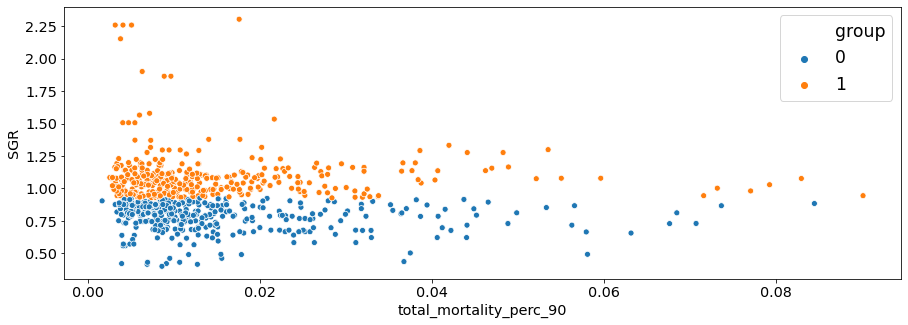

In [ ]:
sns.scatterplot(data=df_smolt_data, x='total_mortality_perc_90', y='SGR', hue='group')
plt.show()


In [ ]:
df_smolt_data['total_mortality_perc_90'] = pd.to_numeric(df_smolt_data['total_mortality_perc_90'], errors='coerce')


In [ ]:
df_smolt_data

,locus_id,fish_group_id,transfer_year,transfer_month,transfer_month_year,transfer_season,total_count,total_mortality_perc_90,transport_mortality_perc_90,nontransport_mortality_perc_90,...,TGC,order_of_creation_from,strain,year_class,number_of_prod_cycle,place_first_feeding,specific_treatment,two_place_of_first_feeding,rolling_tempr_sum,group
0,3046036,1052,2019,1,1_2019,winter,"46388,23077",0.003943,"0,000924979","0,003017925",...,"0,951440321",5,FLY,18,C1B,PH,None,0,783.761800,0
1,3046036,3918,2020,11,11_2020,autumn,"45241,16667",0.007676,"0,005640632","0,002035429",...,"1,181745984",11,FLY,19,C4,PH,LUF,0,641.489505,1
2,3046043,498,2019,7,7_2019,summer,"41131,79661",0.027014,"0,022782874","0,004230661",...,"0,883692915",3,LCY,18,C3,PGR,None,1,2494.159925,0
3,3046052,847,2019,7,7_2019,summer,"41498,96364",0.018027,"0,01520579","0,002821141",...,"1,163037416",3,FLY,18,C3,PGR,None,1,1233.198278,1
4,3046064,159,2019,4,4_2019,spring,"74572,21053",0.011420,"0,002201648","0,009218148",...,"1,409250642",7,FLY,18,C2B,PH,None,0,813.066101,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,7183882,6069,2022,6,6_2022,summer,"44712,52",0.009889,"0,004718095","0,005170589",...,"1,115425012",4,FLY,21,C3,PH,LUF,0,736.388975,1
714,7183884,6069,2022,6,6_2022,summer,"44261,21622",0.022363,"0,014216011","0,008146739",...,"0,87628003",3,FLY,21,C2,PH,LUF,0,1001.523942,0
715,7183889,6071,2022,6,6_2022,summer,"44747,76389",0.012813,"0,002758736","0,010054239",...,"0,768343162",3,FLY,21,C2,PH,LUF,0,1073.508762,0
716,7183892,6069,2022,6,6_2022,summer,"44244,95833",0.022576,"0,015284297","0,007291559",...,"0,87628003",3,FLY,21,C2,PH,LUF,0,1001.523942,0


In [ ]:
group_0 = df_smolt_data[df_smolt_data['group'] == 0]['total_mortality_perc_90']
group_1 = df_smolt_data[df_smolt_data['group'] == 1]['total_mortality_perc_90']

sample_std = np.std(group_0, ddof=1) 

n = len(group_0)  
population_std = sample_std * np.sqrt(n / (n - 1))

In [ ]:
sample_std


0.013306602967795473

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.weightstats import ztest

group_0 = df_smolt_data[df_smolt_data['group'] == 0]['total_mortality_perc_90']
group_1 = df_smolt_data[df_smolt_data['group'] == 1]['total_mortality_perc_90']

population_std = 0.013306602967795473  

z_statistic, p_value = ztest(group_0, group_1, value=0, alternative='two-sided', usevar='pooled', ddof=0)

print("Z-Statistic: ", z_statistic)
print("P-Value: ", p_value)

Z-Statistic:  1.1383337679930507
P-Value:  0.2549811387330352


In [ ]:
Z-test failed and non valid due to distribution form

SyntaxError: invalid syntax (<ipython-input-453-ec8b8be8399b>, line 1)

In [ ]:

group_0 = df_smolt_data[df_smolt_data['group'] == 0]['total_mortality_perc_90']
group_1 = df_smolt_data[df_smolt_data['group'] == 1]['total_mortality_perc_90']
group_0 = np.nan_to_num(group_0)
group_1 = np.nan_to_num(group_1)

#t_statistic, p_value = stats.ttest_ind(group_0, group_1)


#print("T-Statistic: ", t_statistic)
#print("P-Value: ", p_value)

In [ ]:
group_0

array([0.0039429 , 0.02701354, 0.01826335, 0.01029076, 0.03016814,
       0.01096288, 0.00749365, 0.00794324, 0.00861671, 0.00586231,
       0.00429788, 0.02522322, 0.02500973, 0.05659274, 0.0061029 ,
       0.01428896, 0.01909895, 0.02457339, 0.03177858, 0.01229373,
       0.00481079, 0.00806831, 0.01602413, 0.04119383, 0.00844766,
       0.01427144, 0.00787468, 0.02222395, 0.007692  , 0.00487238,
       0.00946684, 0.01819775, 0.00673237, 0.00414994, 0.00607885,
       0.00834038, 0.03942386, 0.01164958, 0.01565856, 0.00919583,
       0.00818953, 0.00656786, 0.00697427, 0.03113898, 0.01135853,
       0.00483341, 0.00847799, 0.02863459, 0.01701344, 0.01007999,
       0.00539158, 0.00433177, 0.00713084, 0.01378732, 0.00835664,
       0.04061044, 0.02522131, 0.01602799, 0.0040942 , 0.0141198 ,
       0.01811986, 0.00751597, 0.01259668, 0.02613854, 0.03231843,
       0.0090834 , 0.02124593, 0.00405238, 0.01197908, 0.04884335,
       0.00576893, 0.01287175, 0.00940755, 0.00778829, 0.01555

In [ ]:
group_0 = df_smolt_data[df_smolt_data['group'] == 0]['total_mortality_perc_90']
group_1 = df_smolt_data[df_smolt_data['group'] == 1]['total_mortality_perc_90']

t_statistic, p_value = stats.ttest_ind(group_0, group_1)


print("T-Statistic: ", t_statistic)
print("P-Value: ", p_value)

T-Statistic:  1.1367472393224218
P-Value:  0.25602426320398103


In [ ]:
T-test failed and non valid due to distribution form

SyntaxError: invalid syntax (<ipython-input-457-41ea2a82d2a0>, line 1)

In [ ]:
from scipy.stats import mannwhitneyu

group_0 = df_smolt_data[df_smolt_data['group'] == 0]['total_mortality_perc_90']
group_1 = df_smolt_data[df_smolt_data['group'] == 1]['total_mortality_perc_90']

statistic, p_value = mannwhitneyu(group_0, group_1, alternative='two-sided')

print("Mann-Whitney U statistic: ", statistic)
print("P-Value: ", p_value)

Mann-Whitney U statistic:  70121.0
P-Value:  0.040953929796124264


In [ ]:

mean_values = df_smolt_data.groupby('group')['total_mortality_perc_90'].mean()
median_values = df_smolt_data.groupby('group')['total_mortality_perc_90'].median()
#mode_values = df_smolt_data.groupby('group')['total_mortality_perc_90'].agg(pd.Series.mode)
min_values = df_smolt_data.groupby('group')['total_mortality_perc_90'].min()
max_values = df_smolt_data.groupby('group')['total_mortality_perc_90'].max()
print("Mean values:")
print(mean_values)
print("\nMedian values:")
print(median_values)
#print("\nMode values:")
#print(mode_values)
print("\nMinimum values:")
print(min_values)
print("\nMaximum values:")
print(max_values)


Mean values:
group
0    0.015552
1    0.014418
Name: total_mortality_perc_90, dtype: float64

Median values:
group
0    0.010956
1    0.009621
Name: total_mortality_perc_90, dtype: float64

Minimum values:
group
0    0.001601
1    0.002496
Name: total_mortality_perc_90, dtype: float64

Maximum values:
group
0    0.084519
1    0.090181
Name: total_mortality_perc_90, dtype: float64


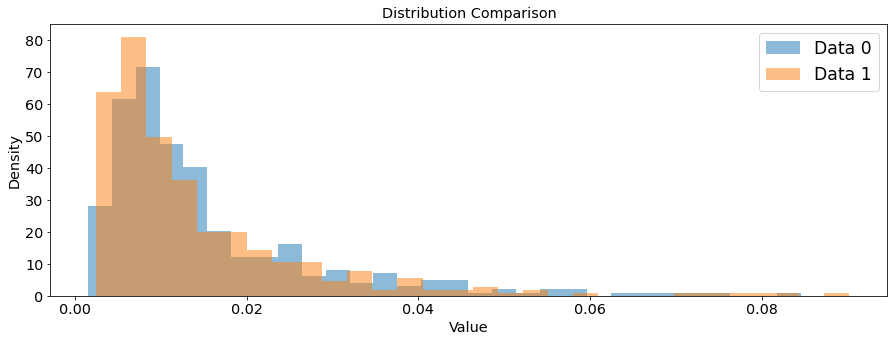

In [ ]:
data0 = df_smolt_data[df_smolt_data['group'] == 0]['total_mortality_perc_90']
data1 = df_smolt_data[df_smolt_data['group'] == 1]['total_mortality_perc_90']
plt.hist(data0, bins=30, alpha=0.5, label='Data 0', density=True)
plt.hist(data1, bins=30, alpha=0.5, label='Data 1', density=True)

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution Comparison')
plt.legend()

plt.show()

In [ ]:
data0 = df_smolt_data[df_smolt_data['group'] == 0]['total_mortality_perc_90']

In [ ]:
sample_mean = data0.mean()
sample_std = data0.std()

In [ ]:

sample_means0 = []
num_samples=3000
sample_size=30
for i in range(num_samples):
    sample = np.random.choice(data0, size=sample_size, replace=True)
    sample_means0.append(sample.mean())

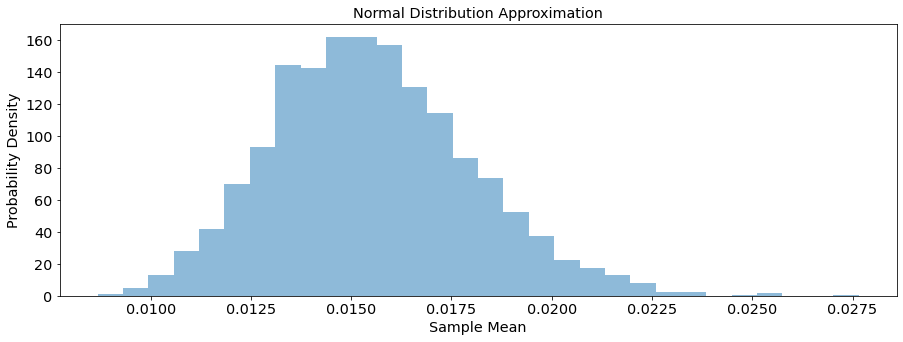

In [ ]:

plt.hist(sample_means0, bins=30, density=True, alpha=0.5)
plt.xlabel('Sample Mean')
plt.ylabel('Probability Density')
plt.title('Normal Distribution Approximation')
plt.show()

In [ ]:
sample_means

[0.02398670770000001,
 0.0117225527,
 0.01567331456666667,
 0.013273918599999998,
 0.01605281223333333,
 0.013774259800000003,
 0.015894291366666664,
 0.013446528499999999,
 0.014162897266666667,
 0.011615804733333335,
 0.014756151166666667,
 0.0148065626,
 0.019479753666666662,
 0.012891579900000002,
 0.015823906000000002,
 0.012426131499999998,
 0.0141320188,
 0.01316659786666667,
 0.010195608333333335,
 0.0170037828,
 0.016370776433333335,
 0.0122604855,
 0.012908749666666669,
 0.012707397766666666,
 0.0129974366,
 0.015773004233333332,
 0.014042988599999999,
 0.014314199233333331,
 0.020120667133333332,
 0.010854358033333332,
 0.018619222266666666,
 0.011714844066666664,
 0.015362657500000003,
 0.011919031000000002,
 0.014498242400000002,
 0.014635888933333334,
 0.014751111366666663,
 0.011385891533333331,
 0.018648878766666665,
 0.015036723133333338,
 0.015986258,
 0.0131336432,
 0.017858160166666668,
 0.013426007133333334,
 0.019952623300000003,
 0.012449649866666667,
 0.01463560

In [ ]:
data1 = df_smolt_data[df_smolt_data['group'] == 1]['total_mortality_perc_90']

In [ ]:
sample_mean = data1.mean()
sample_std = data1.std()

In [ ]:

sample_means1 = []
num_samples=3000
sample_size=30
for i in range(num_samples):
    sample = np.random.choice(data1, size=sample_size, replace=True)
    sample_means1.append(sample.mean())

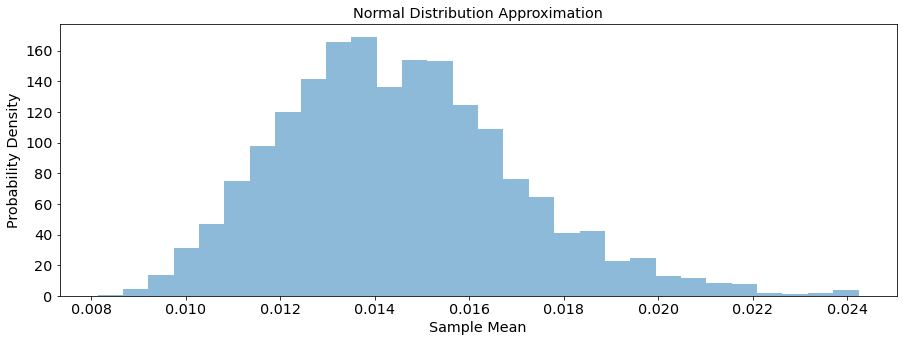

In [ ]:

plt.hist(sample_means1, bins=30, density=True, alpha=0.5)
plt.xlabel('Sample Mean')
plt.ylabel('Probability Density')
plt.title('Normal Distribution Approximation')
plt.show()

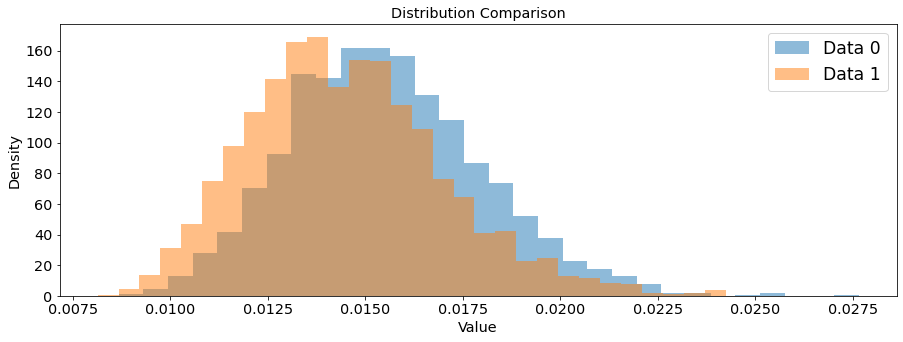

In [ ]:
plt.hist(sample_means0, bins=30, alpha=0.5, label='Data 0', density=True)
plt.hist(sample_means1, bins=30, alpha=0.5, label='Data 1', density=True)

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution Comparison')
plt.legend()

plt.show()

In [ ]:
data0


0      0.003943
2      0.027014
5      0.018263
7      0.010291
12     0.030168
         ...   
711    0.016086
714    0.022363
715    0.012813
716    0.022576
717    0.035174
Name: total_mortality_perc_90, Length: 359, dtype: float64

In [ ]:
group_0 = sample_means0
group_1 = sample_means1


t_statistic, p_value = stats.ttest_ind(group_0, group_1)


print("T-Statistic: ", t_statistic)
print("P-Value: ", p_value)

T-Statistic:  15.794960824524596
P-Value:  4.29362928778392e-55


# TGC

In [ ]:
df_smolt_data['TGC'] = df_smolt_data['TGC'].str.replace(',', '.')

df_smolt_data['TGC'] = df_smolt_data['TGC'].astype(float)

In [ ]:
df_smolt_data = df_smolt_data.dropna(subset=['TGC'])

df_smolt_data = df_smolt_data.reset_index(drop=True)

In [ ]:
median_tgc = df_smolt_data['TGC'].median()


df_smolt_data['group'] = np.where(df_smolt_data['TGC'] < median_tgc, 0, 1)

In [ ]:
df_smolt_data

,locus_id,fish_group_id,transfer_year,transfer_month,transfer_month_year,transfer_season,total_count,total_mortality_perc_90,transport_mortality_perc_90,nontransport_mortality_perc_90,...,TGC,order_of_creation_from,strain,year_class,number_of_prod_cycle,place_first_feeding,specific_treatment,two_place_of_first_feeding,rolling_tempr_sum,group
0,3046036,1052,2019,1,1_2019,winter,"46388,23077",0.003943,"0,000924979","0,003017925",...,0.951440,5,FLY,18,C1B,PH,None,0,783.761800,0
1,3046036,3918,2020,11,11_2020,autumn,"45241,16667",0.007676,"0,005640632","0,002035429",...,1.181746,11,FLY,19,C4,PH,LUF,0,641.489505,1
2,3046043,498,2019,7,7_2019,summer,"41131,79661",0.027014,"0,022782874","0,004230661",...,0.883693,3,LCY,18,C3,PGR,None,1,2494.159925,0
3,3046052,847,2019,7,7_2019,summer,"41498,96364",0.018027,"0,01520579","0,002821141",...,1.163037,3,FLY,18,C3,PGR,None,1,1233.198278,1
4,3046064,159,2019,4,4_2019,spring,"74572,21053",0.011420,"0,002201648","0,009218148",...,1.409251,7,FLY,18,C2B,PH,None,0,813.066101,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,7183882,6069,2022,6,6_2022,summer,"44712,52",0.009889,"0,004718095","0,005170589",...,1.115425,4,FLY,21,C3,PH,LUF,0,736.388975,1
714,7183884,6069,2022,6,6_2022,summer,"44261,21622",0.022363,"0,014216011","0,008146739",...,0.876280,3,FLY,21,C2,PH,LUF,0,1001.523942,0
715,7183889,6071,2022,6,6_2022,summer,"44747,76389",0.012813,"0,002758736","0,010054239",...,0.768343,3,FLY,21,C2,PH,LUF,0,1073.508762,0
716,7183892,6069,2022,6,6_2022,summer,"44244,95833",0.022576,"0,015284297","0,007291559",...,0.876280,3,FLY,21,C2,PH,LUF,0,1001.523942,0


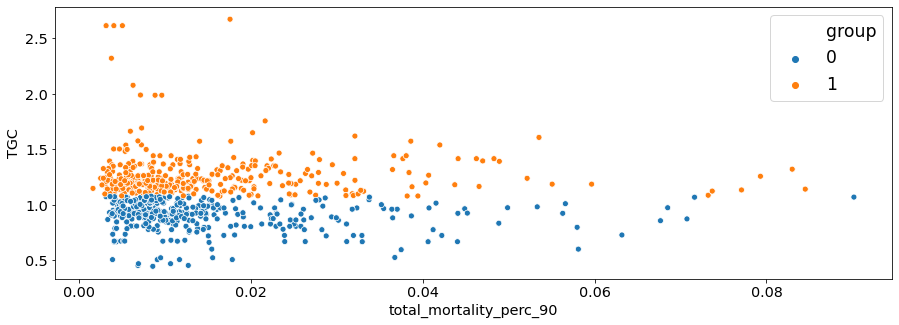

In [ ]:
sns.scatterplot(data=df_smolt_data, x='total_mortality_perc_90', y='TGC', hue='group')
plt.show()


In [ ]:
group_0 = df_smolt_data[df_smolt_data['group'] == 0]['total_mortality_perc_90']
group_1 = df_smolt_data[df_smolt_data['group'] == 1]['total_mortality_perc_90']

sample_std = np.std(group_0, ddof=1) 

n = len(group_0)  
population_std = sample_std * np.sqrt(n / (n - 1))

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.weightstats import ztest

group_0 = df_smolt_data[df_smolt_data['group'] == 0]['total_mortality_perc_90']
group_1 = df_smolt_data[df_smolt_data['group'] == 1]['total_mortality_perc_90']

population_std = sample_std 

z_statistic, p_value = ztest(group_0, group_1, value=0, alternative='two-sided', usevar='pooled', ddof=0)


print("Z-Statistic: ", z_statistic)
print("P-Value: ", p_value)

Z-Statistic:  0.15656234169421418
P-Value:  0.8755897834329559


In [ ]:

group_0 = df_smolt_data[df_smolt_data['group'] == 0]['total_mortality_perc_90']
group_1 = df_smolt_data[df_smolt_data['group'] == 1]['total_mortality_perc_90']
group_0 = np.nan_to_num(group_0)
group_1 = np.nan_to_num(group_1)

In [ ]:
group_0 = df_smolt_data[df_smolt_data['group'] == 0]['total_mortality_perc_90']
group_1 = df_smolt_data[df_smolt_data['group'] == 1]['total_mortality_perc_90']


t_statistic, p_value = stats.ttest_ind(group_0, group_1)


print("T-Statistic: ", t_statistic)
print("P-Value: ", p_value)

T-Statistic:  0.15634413623389776
P-Value:  0.8758058392390291


In [ ]:
group_0 = df_smolt_data[df_smolt_data['group'] == 0]['total_mortality_perc_90']
group_1 = df_smolt_data[df_smolt_data['group'] == 1]['total_mortality_perc_90']

statistic, p_value = mannwhitneyu(group_0, group_1, alternative='two-sided')

print("Mann-Whitney U statistic: ", statistic)
print("P-Value: ", p_value)

Mann-Whitney U statistic:  66794.0
P-Value:  0.3971361626745382


In [ ]:

mean_values = df_smolt_data.groupby('group')['total_mortality_perc_90'].mean()
median_values = df_smolt_data.groupby('group')['total_mortality_perc_90'].median()
#mode_values = df_smolt_data.groupby('group')['total_mortality_perc_90'].agg(pd.Series.mode)
min_values = df_smolt_data.groupby('group')['total_mortality_perc_90'].min()
max_values = df_smolt_data.groupby('group')['total_mortality_perc_90'].max()

print("Mean values:")
print(mean_values)
print("\nMedian values:")
print(median_values)
#print("\nMode values:")
#print(mode_values)
print("\nMinimum values:")
print(min_values)
print("\nMaximum values:")
print(max_values)


Mean values:
group
0    0.015063
1    0.014907
Name: total_mortality_perc_90, dtype: float64

Median values:
group
0    0.010629
1    0.010037
Name: total_mortality_perc_90, dtype: float64

Minimum values:
group
0    0.003121
1    0.001601
Name: total_mortality_perc_90, dtype: float64

Maximum values:
group
0    0.090181
1    0.084519
Name: total_mortality_perc_90, dtype: float64


In [ ]:
#Прочий хлам удали 

In [ ]:
df_smolt_data[df_smolt_data.from_locus_population_id.isin([36794095])]['date_conf']

798   2019-06-20
Name: date_conf, dtype: datetime64[ns]

In [ ]:
df_smolt_data.columns

Index(['locus_id', 'fish_group_id', 'transfer_year', 'transfer_month',
       'transfer_month_year', 'transfer_season', 'total_count',
       'total_mortality_perc_90', 'transport_mortality_perc_90',
       'nontransport_mortality_perc_90', 'from_date', 'from_site_name',
       'from_site_id', 'from_locus_id', 'from_locus_population_id',
       'from_fish_group_id', 'from_fish_group_name', 'from_generation',
       'from_year_class', 'from_count_stocking', 'from_avg_weight', 'to_date',
       'type_id', 'to_site_name', 'to_site_id', 'to_locus_id',
       'to_locus_population_id', 'to_fish_group_id', 'to_fish_group_name',
       'to_generation', 'to_year_class', 'to_count_stocking', 'to_avg_weight',
       'transfer_date', 'from_fish_group_count', 'days_btw_to_from',
       'days_btw_to_transfer', 'vac_fish_count', 'vac_weight',
       'days_btw_conf_event', '00000000000SRSv/Pha ', '000IPN+AAA+VVV+ISA/Pha',
       'IPN+SRS+VIB+ASA+ISA/FAV', 'IPN+SRS+VVV+AAA+ISA/Pha',
       'IPN+SRS+VVV

In [ ]:
temperatures['event_date'] = pd.to_datetime(temperatures['event_date'], format='%d.%m.%Y')


filtered_temperatures = temperatures[(temperatures['final_locus_population_id'] == 36794095) &
                                    (temperatures['event_date'] >= pd.to_datetime('27.09.2019', format='%d.%m.%Y')) &
                                    (temperatures['event_date'] <= pd.to_datetime('04.01.2020', format='%d.%m.%Y'))]

sum_rolling_tempr = filtered_temperatures['rolling_tempr'].sum()


In [ ]:
sum_rolling_tempr

12.496666666666668